In [1]:
import openslide
import numpy as np
import scipy.signal as signal
import scipy.io as sio
import cv2

In [2]:
slide = openslide.open_slide('../8602.svs')
dimensions = slide.level_dimensions
downsamples = slide.level_downsamples
print(dimensions)
print(downsamples)

((87648, 22787), (21912, 5696), (5478, 1424), (2739, 712))
(1.0, 4.000263342696629, 16.001053370786515, 32.00210674157303)


In [3]:
# (0, 0), 4, (21912, 5696)
downsample_img = np.array(slide.read_region((0, 0), 1, dimensions[1]))

In [4]:
n, m, z = downsample_img.shape
bw = np.zeros((n, m))
print('n, m, z is ', n, m, z)
print('bw shape is ', bw.shape)

n, m, z is  5696 21912 4
bw shape is  (5696, 21912)


In [5]:
for i in range(n):
    for j in range(m):
        if downsample_img[i, j, 0] > 130 and (((int(downsample_img[i, j, 0]) - int(downsample_img[i, j, 1])) > 30) or ((
                int(downsample_img[i, j, 0]) - int(downsample_img[i, j, 2])) > 30)):
            bw[i, j] = 1

In [39]:
img_Blur = cv2.blur(bw, (100, 100), cv2.BORDER_REPLICATE)
print(img_Blur[572, 960:986])

[0.37   0.3728 0.3753 0.378  0.38   0.3823 0.385  0.3878 0.3902 0.3928
 0.3957 0.3981 0.4008 0.4027 0.4048 0.4082 0.4109 0.4136 0.4162 0.4187
 0.4211 0.4235 0.4262 0.4282 0.4303 0.4319]


In [40]:
data = sio.loadmat('h.mat')
print(img_Blur.shape)
print(data['h'].shape)

(5696, 21912)
(5696, 21912)


In [41]:
result = img_Blur.copy()
result[572, 960:986]

array([0.37  , 0.3728, 0.3753, 0.378 , 0.38  , 0.3823, 0.385 , 0.3878,
       0.3902, 0.3928, 0.3957, 0.3981, 0.4008, 0.4027, 0.4048, 0.4082,
       0.4109, 0.4136, 0.4162, 0.4187, 0.4211, 0.4235, 0.4262, 0.4282,
       0.4303, 0.4319])

In [42]:
result[result > 0.4] = 1
result[result <= 0.4] = 0
print(result[572, 960:986])
print(img_Blur[572, 960:986])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.37   0.3728 0.3753 0.378  0.38   0.3823 0.385  0.3878 0.3902 0.3928
 0.3957 0.3981 0.4008 0.4027 0.4048 0.4082 0.4109 0.4136 0.4162 0.4187
 0.4211 0.4235 0.4262 0.4282 0.4303 0.4319]


In [43]:
np.sum(result)

10886894.0

In [44]:
bw3 = np.zeros((n, m, z), dtype=np.uint8)
bw3[:,:,0] = result
bw3[:,:,1] = result
bw3[:,:,2] = result
bw3[:,:,3] = 1

In [45]:
BackRemImg=bw3 * downsample_img

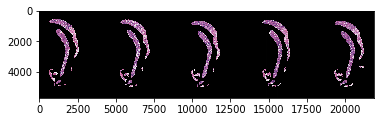

In [46]:
import matplotlib.pyplot as plt
plt.imshow(BackRemImg)
plt.show()

In [47]:
import scipy.misc

scipy.misc.imsave('backRem.tif', BackRemImg)

/home/frodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
print(np.sum(img_Blur))
print(np.sum(data['h']))

8488931.710000027
8488843.749200044


In [49]:
print(img_Blur.shape)
print(data['h'].shape)

(5696, 21912)
(5696, 21912)


In [50]:
print(img_Blur[572, 960:986])
print(data['h'][572, 960:986])

[0.37   0.3728 0.3753 0.378  0.38   0.3823 0.385  0.3878 0.3902 0.3928
 0.3957 0.3981 0.4008 0.4027 0.4048 0.4082 0.4109 0.4136 0.4162 0.4187
 0.4211 0.4235 0.4262 0.4282 0.4303 0.4319]
[0.3816 0.3842 0.387  0.3891 0.3914 0.3941 0.3969 0.3993 0.4019 0.4048
 0.4072 0.4099 0.4118 0.4139 0.4173 0.42   0.4226 0.4251 0.4276 0.43
 0.4325 0.4352 0.4372 0.4393 0.4409 0.4425]


In [52]:
print(BackRemImg[572, 960:986, 0])

[  0   0   0   0   0   0   0   0   0   0   0   0 165 160 137 167 153 102
 115 121 154 167 168 206 203 205]
